# Load Imports


In [1]:
# ! pip install tensorflow matplotlib numpy


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

# Set all the Constants (hyper parameters)

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 255
CHANNELS = 3
EPOCHS = 20

# Import data into tensorflow dataset object

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='Train',
    seed =123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 900 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
for image_batch,label_batch in dataset.take(1):
    print("Image Batch Shape : ", image_batch.shape)
    print("Single Image : ", image_batch[0])
    print("Label Image numpy : ", label_batch.numpy)

Image Batch Shape :  (32, 255, 255, 3)
Single Image :  tf.Tensor(
[[[146.89827  134.89827  138.89827 ]
  [117.32479  105.32479  109.32479 ]
  [159.80559  147.80559  151.80559 ]
  ...
  [189.00586  179.00586  178.00586 ]
  [188.99608  178.99608  177.99608 ]
  [188.99413  178.99413  177.99413 ]]

 [[125.09177  113.09177  117.09177 ]
  [153.73062  141.73062  145.73062 ]
  [135.74919  123.74919  127.74919 ]
  ...
  [187.0177   177.0177   176.0177  ]
  [187.01765  177.01765  176.01765 ]
  [186.02547  176.02547  175.02547 ]]

 [[131.32344  119.323456 123.323456]
  [126.39447  114.39447  118.39447 ]
  [143.41678  131.41678  135.41678 ]
  ...
  [190.0195   180.0195   179.0195  ]
  [190.00006  180.00006  179.00006 ]
  [190.       180.       179.      ]]

 ...

 [[133.22902  120.22902  127.22902 ]
  [135.18733  122.18733  129.18733 ]
  [146.90227  133.90227  140.90227 ]
  ...
  [166.02007  156.02007  165.02007 ]
  [160.97076  150.97076  159.97076 ]
  [167.92755  157.92755  166.92755 ]]

 [[138.9

In [7]:
len(class_names)

3

# Visualize some of the images from our daataset

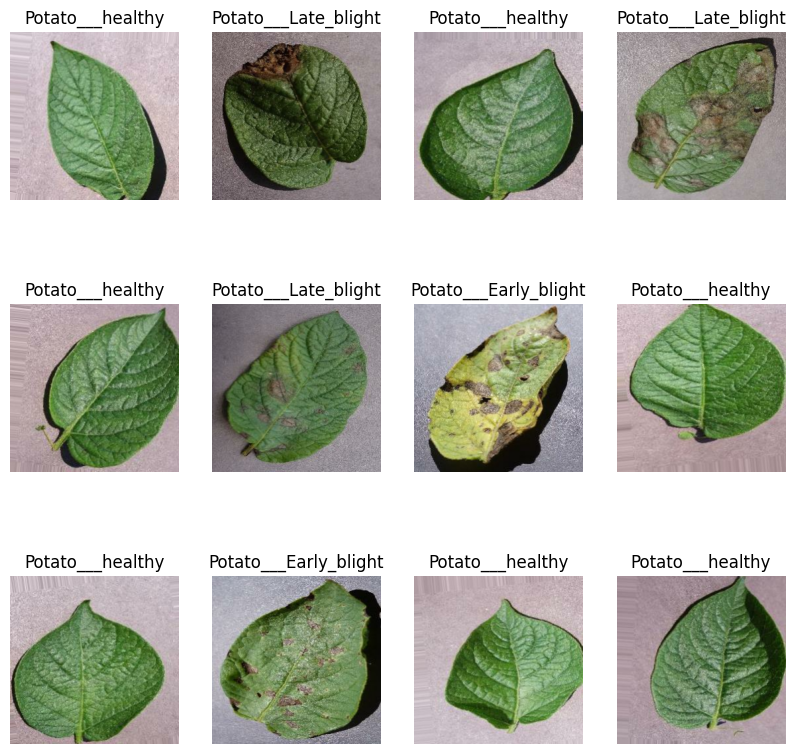

In [8]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    # Code to process the first batch of images and labels
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

# Function to split the dataset

In [9]:
len(dataset)

29

In [10]:
train_size = 0.8
len(dataset) * train_size

23.200000000000003

In [11]:
train_ds = dataset.take(23)
len(train_ds)

23

In [12]:
test_ds = dataset.skip(23)
len(test_ds)

6

In [13]:
val_size = 0.1
len(dataset) * val_size

2.9000000000000004

In [14]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [15]:
test_ds = test_ds.skip(3)
len(test_ds)

3

In [16]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [17]:
len(train_ds)

23

In [18]:
len(val_ds)

2

In [19]:
len(test_ds)

4

# Cache, Shuffle, and Prefetch the Dataset

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the model

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

# Data Augmentation 

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Applying Data Augmentation to Train Dataset

In [23]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)
                        ).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)
model.summary()


c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the Model

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [26]:
history = model.fit(
    train_ds,
    batch_size = BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 721ms/step - accuracy: 0.3503 - loss: 1.0984 - val_accuracy: 0.2188 - val_loss: 1.1241
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 706ms/step - accuracy: 0.4393 - loss: 1.0117 - val_accuracy: 0.7500 - val_loss: 0.9821
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 649ms/step - accuracy: 0.5833 - loss: 0.8518 - val_accuracy: 0.6719 - val_loss: 0.7108
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 635ms/step - accuracy: 0.6497 - loss: 0.7399 - val_accuracy: 0.7500 - val_loss: 0.6506
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step - accuracy: 0.7161 - loss: 0.6107 - val_accuracy: 0.7344 - val_loss: 0.5809
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 713ms/step - accuracy: 0.7387 - loss: 0.5194 - val_accuracy: 0.7812 - val_loss: 0.4849
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 684ms/step - accuracy: 0.7924 - loss: 0.4315 - val_accuracy: 0.8594 - val_loss: 0.4120
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 683ms/step - accuracy: 0.8503 - loss: 0.3642 - val_accu

In [27]:
sores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.9766 - loss: 0.1006


In [28]:
model.save('model.h5')

# Plotting the Accuracy and Loss Curves

In [29]:
print(history)
print(history.params)
print(history.history.keys())


{'verbose': 1, 'epochs': 20, 'steps': 23}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [30]:
# show loss for first 5 epochs
history.history['loss'][:5] 

[1.0984264612197876,
 1.011726975440979,
 0.851844310760498,
 0.7398825883865356,
 0.6106921434402466]

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

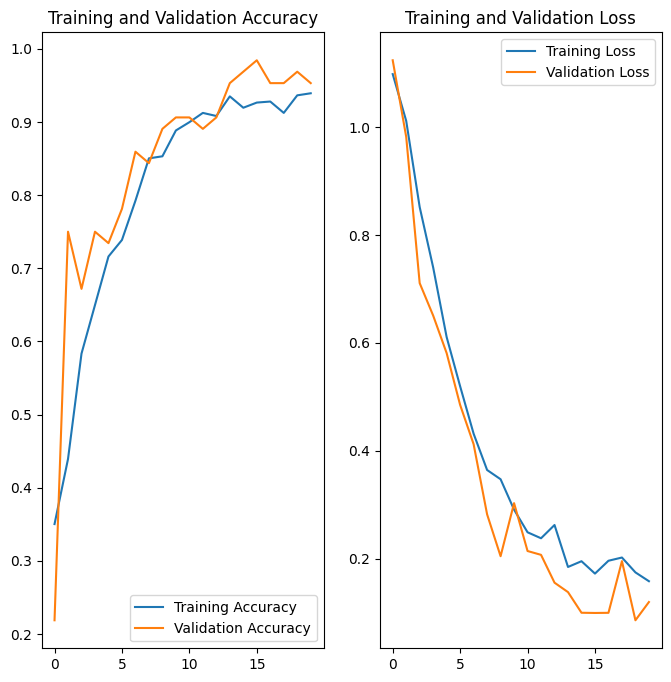

In [32]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run Predictions on a sample image

In [33]:
model = tf.keras.models.load_model('model.h5')

First Image to predict
First Label:  Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
Predicted Label:  Potato___Late_blight


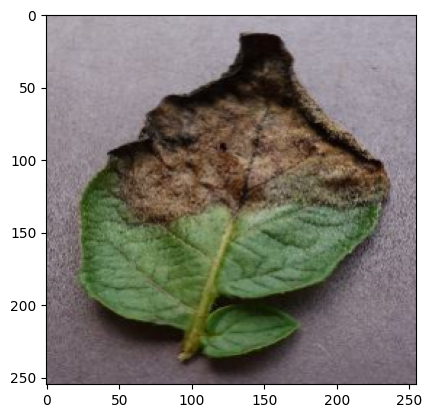

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("First Image to predict")
    plt.imshow(first_image)
    print("First Label: ", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_prediction[0])])


# Write a function for inference

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images_batch[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


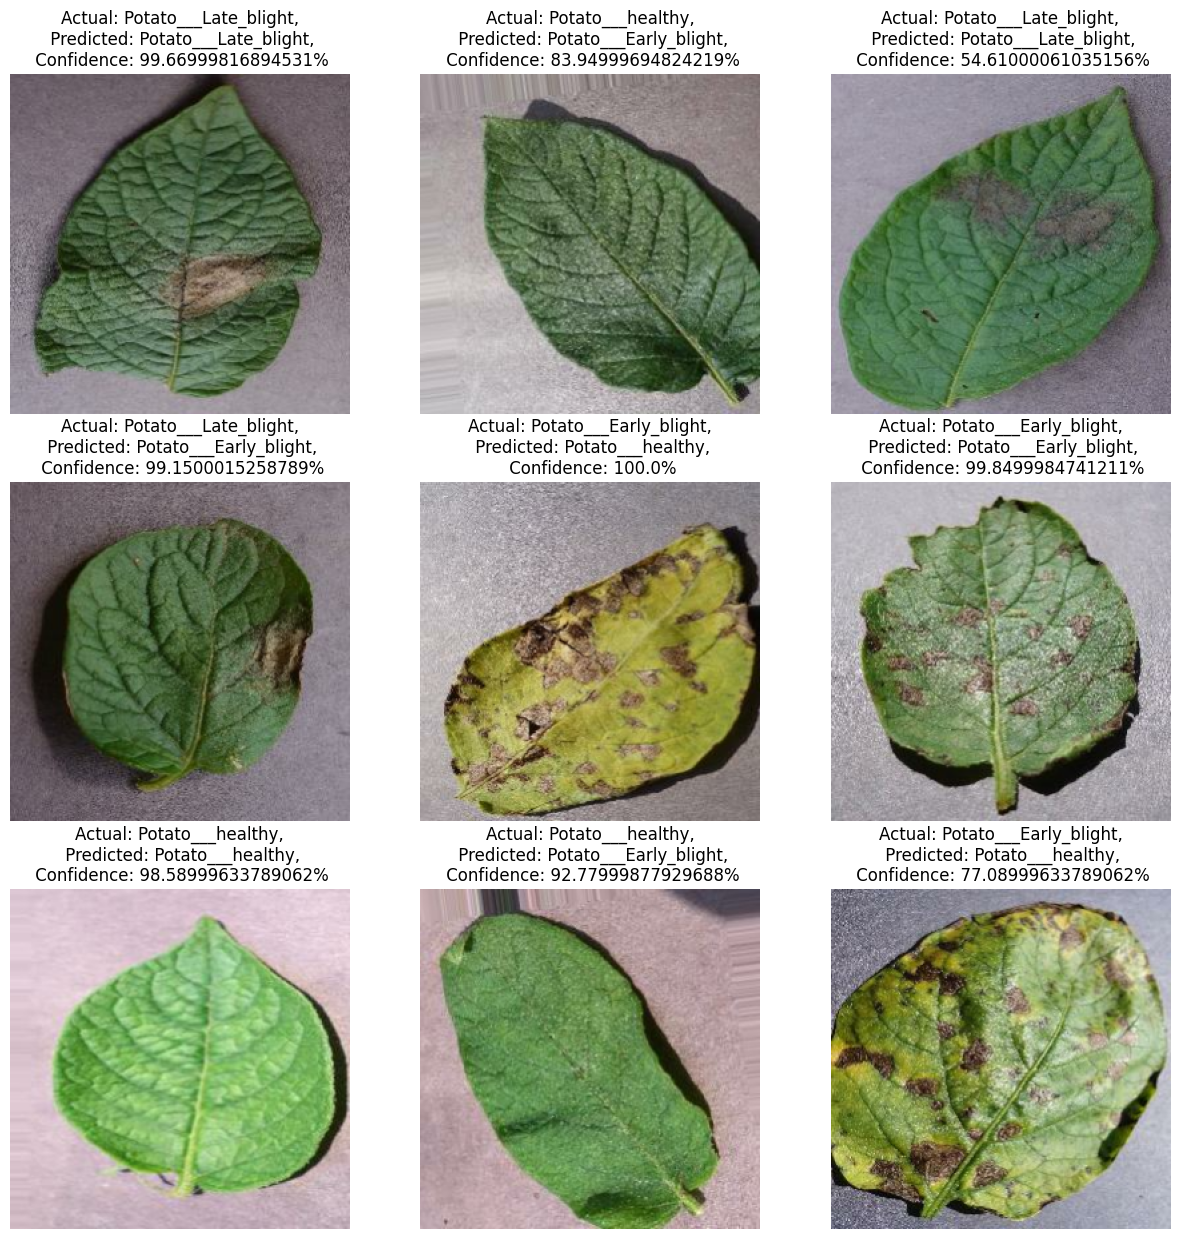

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")